<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_Data20201130_20201204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/M2K20201130_1204.pkl')

In [189]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [191]:
df.drop('time', axis=1, inplace=True)

In [192]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [194]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-11-29 18:00:00')

In [77]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [218]:

df["pdiffmin"] = (df.avg - df.avg.shift(periods=1)).fillna(0.0)
df["pdiffmin"] = (df.avg - df.avg.shift(periods=12)).fillna(0.0)
df["pdiff5min"] = (df.avg - df.avg.shift(periods=60)).fillna(0.0)
df["pdiff10min"] = (df.avg - df.avg.shift(periods=120)).fillna(0.0)
df["pdiff15min"] = (df.avg - df.avg.shift(periods=180)).fillna(0.0)
df["pdiff30min"] = (df.avg - df.avg.shift(periods=360)).fillna(0.0)
df["pdiffhr"] = (df.avg - df.avg.shift(periods=720)).fillna(0.0)

In [204]:
df.columns[11:19]

Index(['pdiff', 'pdiffmin', 'pdiff5min', 'pdiff10min', 'pdiff15min',
       'pdiff30min', 'pdiffhr'],
      dtype='object')

In [205]:
df.shape[0]

81487

In [207]:
df_corr = df[df.columns[11:19]]
df_corr.drop(df_corr.head(720).index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [208]:
df_corr.head()

,pdiff,pdiffmin,pdiff5min,pdiff10min,pdiff15min,pdiff30min,pdiffhr
720,0.02,0.45,-0.55,-1.45,-2.85,-4.05,-3.83
721,-0.22,0.23,-0.62,-1.47,-2.87,-4.27,-4.71
722,-0.03,0.10,-0.60,-1.60,-2.90,-4.20,-4.90
723,0.00,0.10,-0.60,-1.75,-2.90,-4.20,-4.09
724,0.00,-0.10,-0.60,-2.00,-2.70,-4.18,-5.09


In [220]:
df_corr.corr()

,pdiff,pdiffmin,pdiff5min,pdiff10min,pdiff15min,pdiff30min,pdiffhr
pdiff,1.000000,0.284614,0.127844,0.087313,0.073352,0.048670,0.036136
pdiffmin,0.284614,1.000000,0.440821,0.298963,0.251659,0.171641,0.126959
pdiff5min,0.127844,0.440821,1.000000,0.695334,0.560281,0.385855,0.285859
pdiff10min,0.087313,0.298963,0.695334,1.000000,0.803352,0.556718,0.402050
pdiff15min,0.073352,0.251659,0.560281,0.803352,1.000000,0.693980,0.488600
pdiff30min,0.048670,0.171641,0.385855,0.556718,0.693980,1.000000,0.681266
pdiffhr,0.036136,0.126959,0.285859,0.402050,0.488600,0.681266,1.000000


In [147]:
stat.pearsonr(df_corr.pdiff, df_corr.pdiff60)

(0.28458114908657434, 0.0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


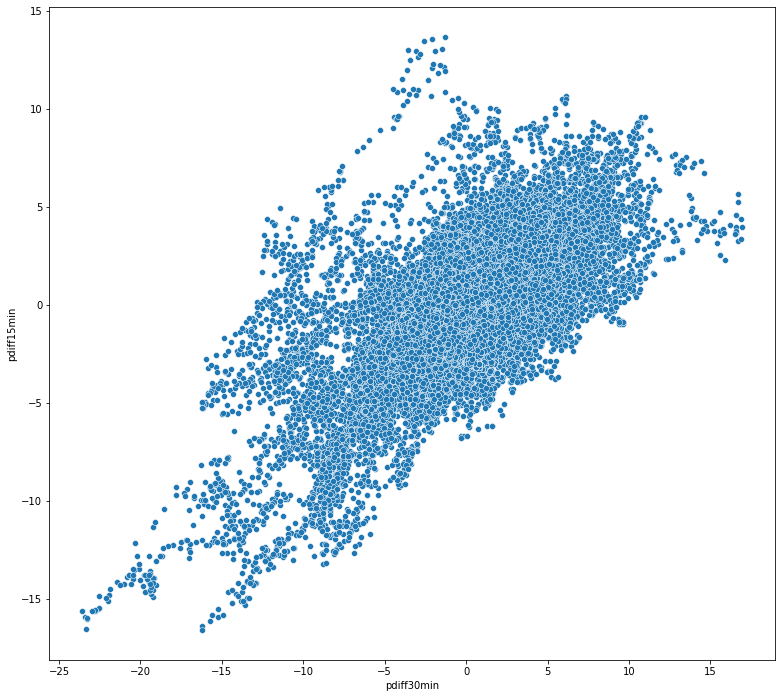

In [224]:
a4_dims = (13,12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(df_corr.pdiff30min, df.pdiff15min)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


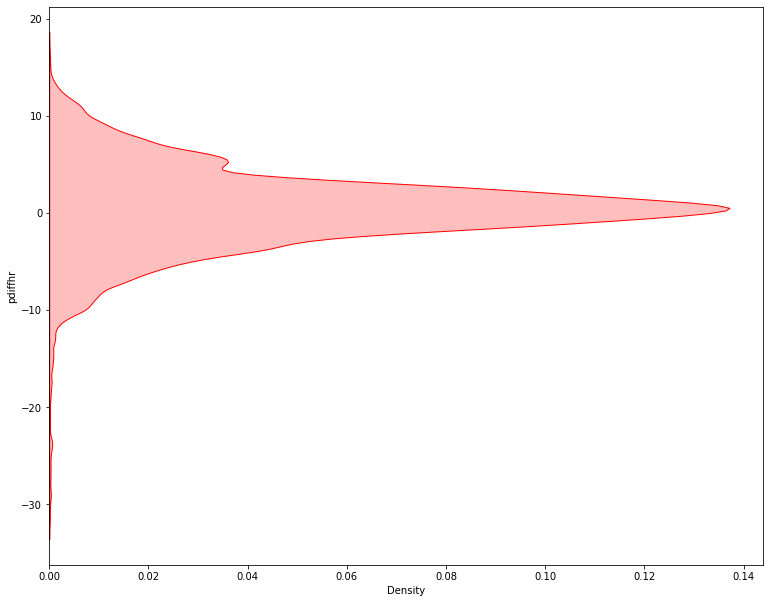

In [221]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df_corr.pdiffhr, shade=True, vertical=True, color="red")